## Scaling Images

1. Write the code in function form in Python, and compute the resultant image size with respect to the given transformation matrix.
2. Extend your code to handle colored image.

### Q:1-Solution

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
imgGray = cv2.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/2- 2D-scaling-Transformation/images/albert-einstein-gray.jpg', cv2.IMREAD_GRAYSCALE)

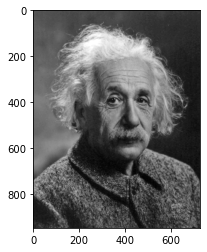

In [17]:
plt.imshow(imgGray, cmap='gray')

In [18]:
def get_scaling_matrix(scale):
    size = len(scale)
    matrix = np.zeros((size, size))
    for i, _ in enumerate(matrix):
        print(i)
        matrix[i][i] = scale[i]
    return matrix

In [19]:
get_scaling_matrix([2, 2])

0
1


array([[2., 0.],
       [0., 2.]])

In [20]:
def f_bilinearInterpolate(r, c, I):
    lc = int(c)
    rc = lc + 1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr + 1
    wt = br - r
    wb = r - tr
    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]: # check interpolation pt is in the image
        a = wl * I[tr, lc] + wr * I[tr, rc]
        b = wl * I[br, lc] + wr * I[br, rc]
        g = a * wb + b * wt
        return np.uint8(g)
    else:
        return 0

In [29]:
def f_scaleImage(scale, img_Gray):
    """
    Scale image by matrix of BiLinear Interpolation method
    """
    
    numRows = img_Gray.shape[0]
    numCols = img_Gray.shape[1]
    
    size = len(scale)
    matrix = np.zeros((size, size))
    for i, _ in enumerate(matrix):
        matrix[i][i] = scale[i]
    scale_mat = matrix
    print(scale_mat)
    
    I2 = np.zeros((int(scale[0])*numRows, int(scale[1])*numCols), dtype='uint8')
    Tinv = np.linalg.inv(scale_mat)
    for new_i in range(I2.shape[0]):
        for new_j in range(I2.shape[1]):
            P_dash = np.array([new_i, new_j])
            P = Tinv.dot(P_dash)
            i, j = P[0], P[1]
            if i<0 or i>=numRows or j<0 or j>=numCols:
                pass
            else:
                g = f_bilinearInterpolate(i, j, img_Gray)
                I2[new_i, new_j] = g
    return I2

In [30]:
f_scaleImage([2, 2], imgGray)

[[2. 0.]
 [0. 2.]]


array([[85, 85, 85, ..., 64,  0,  0],
       [85, 85, 85, ..., 63,  0,  0],
       [85, 85, 85, ..., 58,  0,  0],
       ...,
       [31, 34, 38, ..., 43,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [31]:
import matplotlib as mpl
def displayImageInActualSize(I):
    dpi = mpl.rcParams['figure.dpi']
    h, w = I.shape
    figSize = w/float(dpi), h/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(I, cmap='gray')
    plt.show

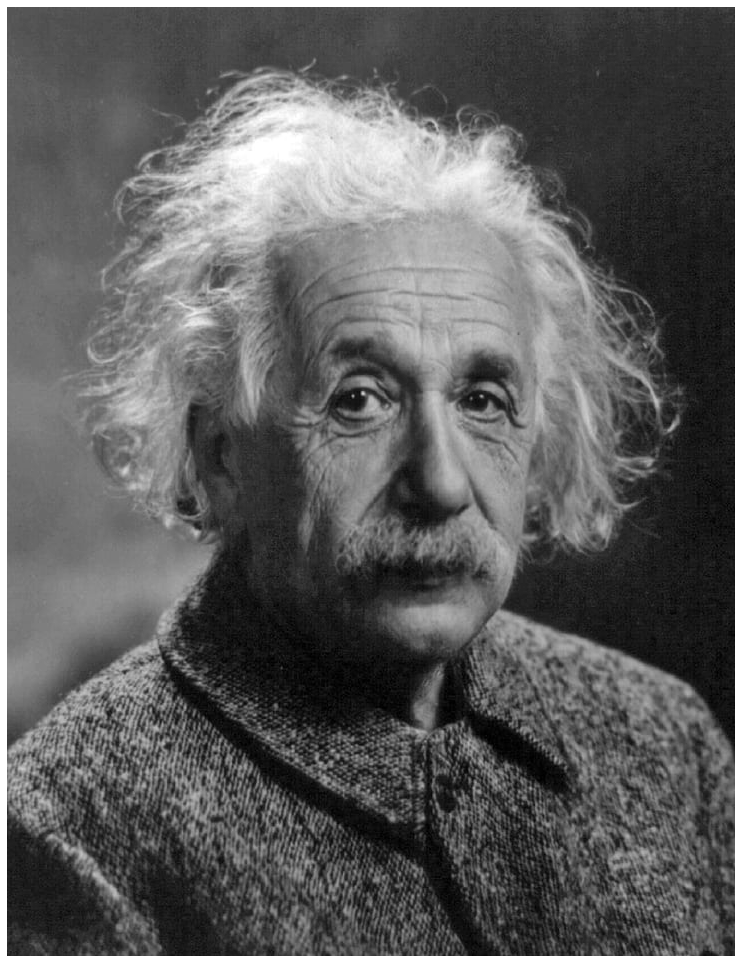

In [32]:
displayImageInActualSize(imgGray)

### Q:2-Solution

In [42]:
imgTulip = cv2.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/2- 2D-scaling-Transformation/images/tulips.jpg')

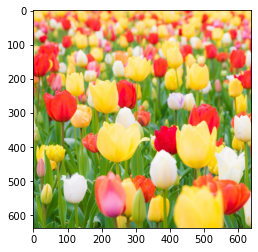

In [43]:
plt.imshow(imgTulip[:, :, ::-1])

In [44]:
def displayImageInActualSizeColor(I):
    dpi = mpl.rcParams['figure.dpi']
    h, w = I.shape[0:2]
    figSize = w/float(dpi), h/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(I, cmap='gray')
    plt.show

In [48]:
I_clr = imgTulip[:, :, ::-1]
scale = [2, 2]
r = f_scaleImage(scale, I_clr[:, :, 0])
g = f_scaleImage(scale, I_clr[:, :, 1])
b = f_scaleImage(scale, I_clr[:, :, 2])

[[2. 0.]
 [0. 2.]]
[[2. 0.]
 [0. 2.]]
[[2. 0.]
 [0. 2.]]


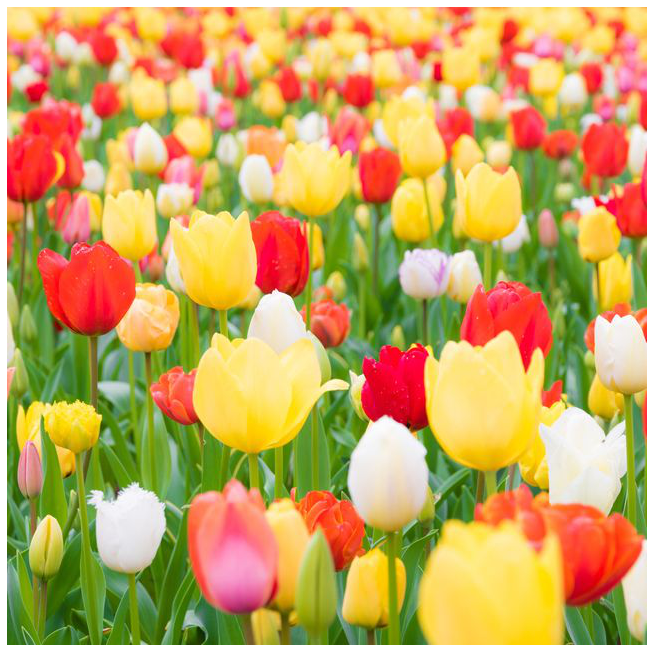

In [49]:
displayImageInActualSizeColor(I_clr)

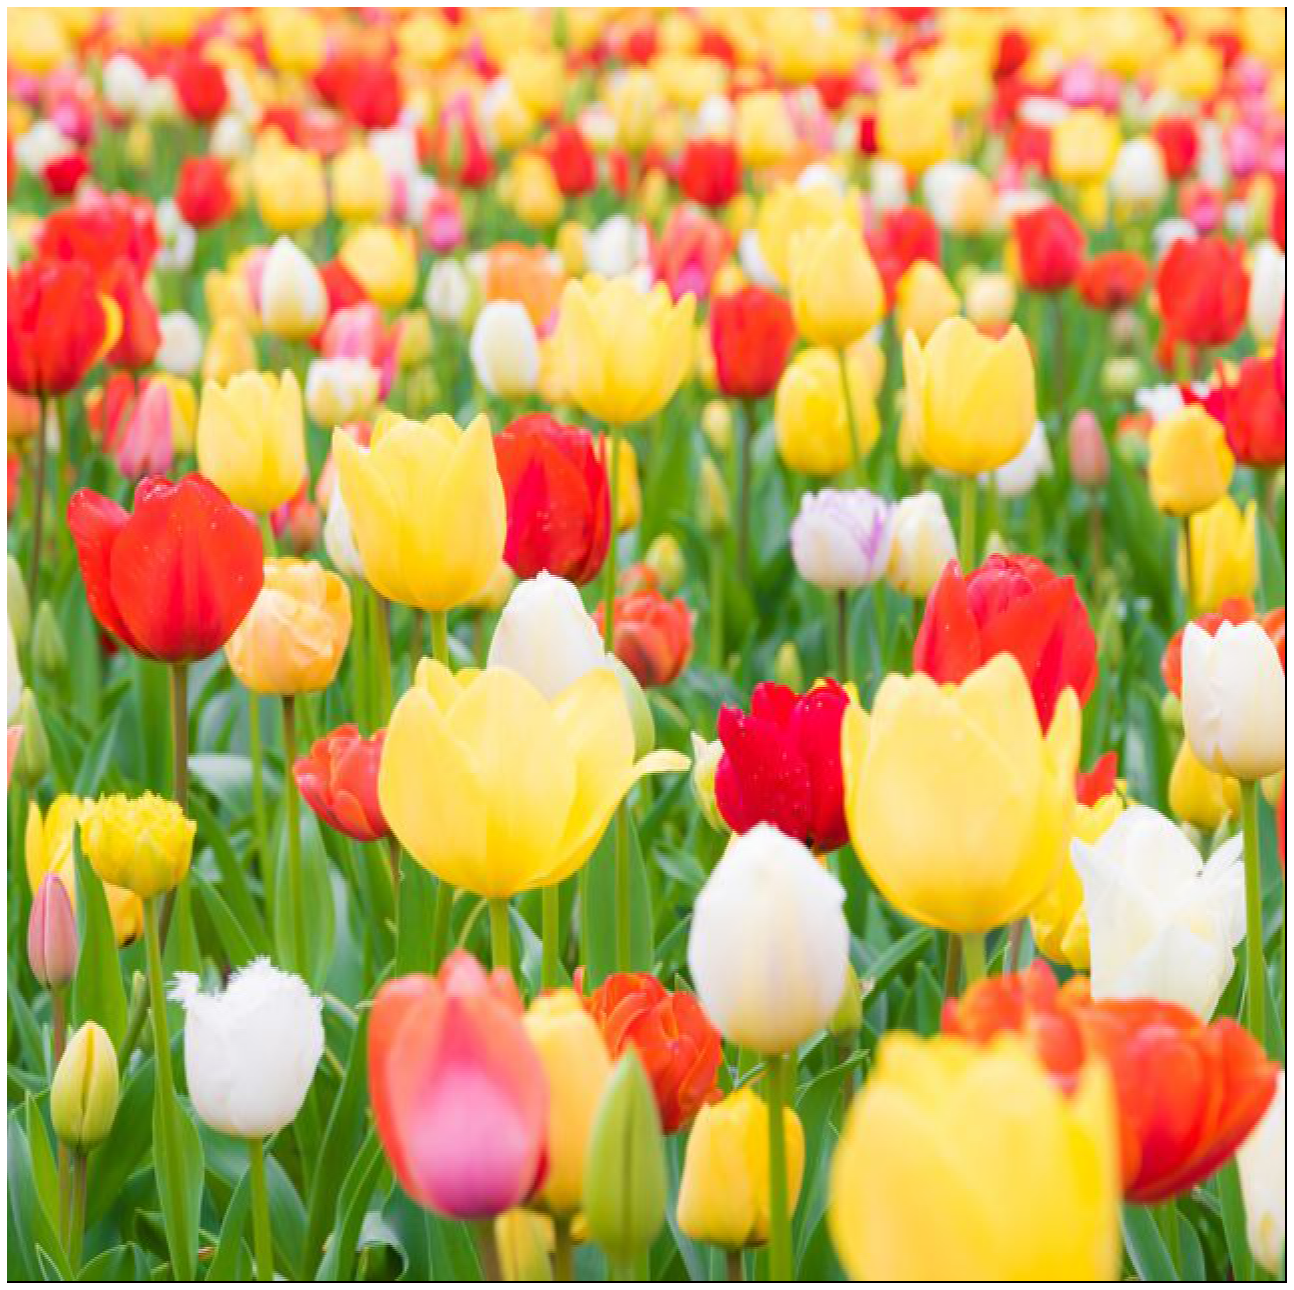

In [50]:
cImg = np.zeros((r.shape[0], r.shape[1], 3), dtype=np.uint8)
cImg[:, :, 0] = r
cImg[:, :, 1] = g
cImg[:, :, 2] = b
displayImageInActualSizeColor(cImg)

In [51]:
from yad2k.models.keras_yolo import yolo_head

ModuleNotFoundError: No module named 'yad2k'